In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/customer-segmentation-dataset")

print("Path to dataset files:", path)

100%|██████████| 21.8M/21.8M [00:00<00:00, 83.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/customer-segmentation-dataset/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/yasserh/customer-segmentation-dataset/versions/1/

'Online Retail.xlsx'


In [ ]:
import pandas as pd

file_path = '/root/.cache/kagglehub/datasets/yasserh/customer-segmentation-dataset/versions/1/Online Retail.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df1 = df[df["Quantity"] < 0]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df2 = df[df["UnitPrice"] < 0]
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df = df[(df.Quantity>0) & (df.UnitPrice>0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['Description'] = df['Description'].fillna('Unknown')

In [ ]:
df = df.dropna(subset=['CustomerID'])

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df['InvoiceDate']

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [ ]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [ ]:
df['Total'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


###### Now computing RFM metrics

In [ ]:
ref_date = df['InvoiceDate'].max()

customers_rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,   # Recency
    'InvoiceNo': 'count',                                 # Frequency
    'Total': 'sum'                                        # Monetary Value
})

In [ ]:
customers_rfm

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [ ]:
customers_rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total': 'Monetary Value'
},inplace=True)
customers_rfm = customers_rfm.reset_index()

#### EDA

In [ ]:
customers_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      4338 non-null   float64
 1   Recency         4338 non-null   int64  
 2   Frequency       4338 non-null   int64  
 3   Monetary Value  4338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


In [ ]:
customers_rfm.describe()

,CustomerID,Recency,Frequency,Monetary Value
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.059474,91.720609,2054.266460
std,1721.808492,100.012264,228.785094,8989.230441
min,12346.000000,0.000000,1.000000,3.750000
25%,13813.250000,17.000000,17.000000,307.415000
50%,15299.500000,50.000000,41.000000,674.485000
75%,16778.750000,141.750000,100.000000,1661.740000
max,18287.000000,373.000000,7847.000000,280206.020000


Visualizing the distribution of RFM metrics

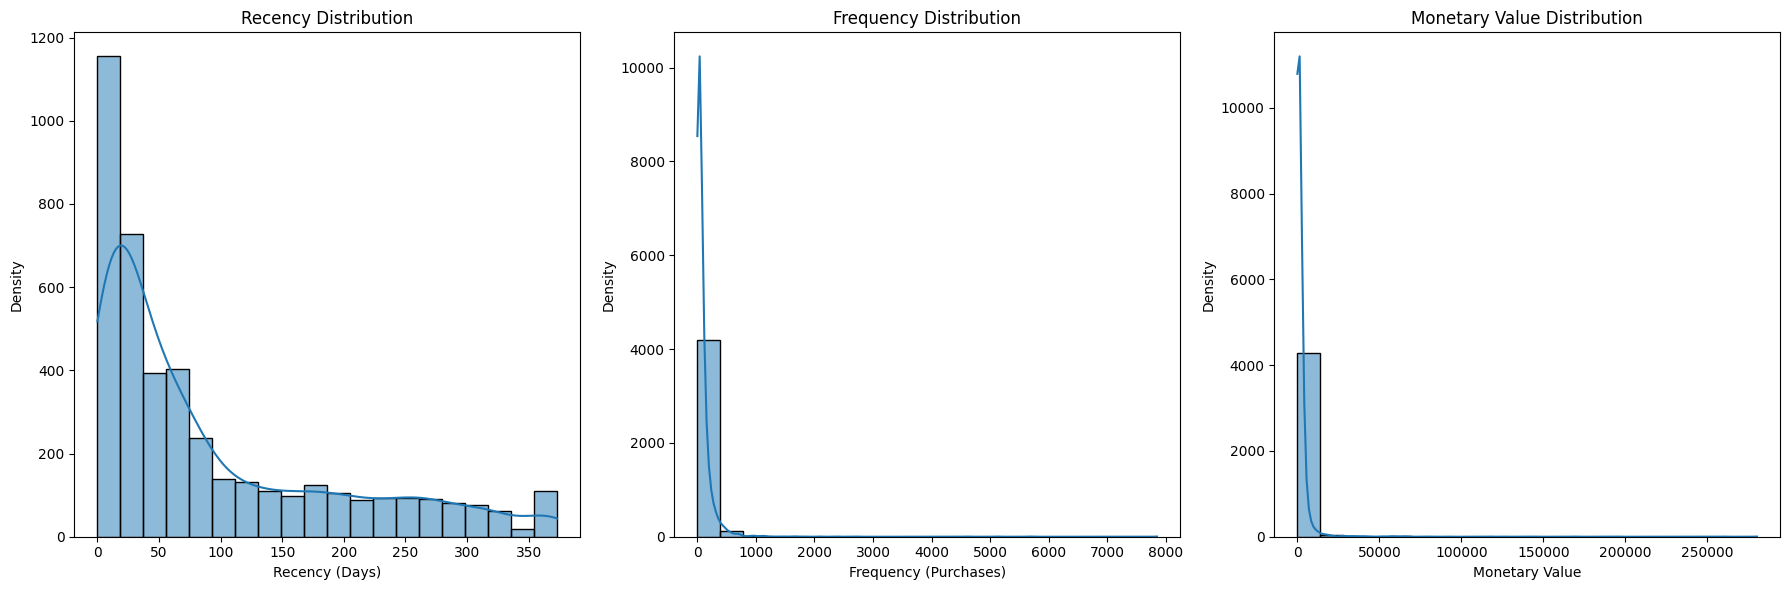

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Recency Distribution
sns.histplot(customers_rfm['Recency'], kde=True, bins=20, ax=axes[0])
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Density')

# Frequency Distribution
sns.histplot(customers_rfm['Frequency'], kde=True, bins=20, ax=axes[1])
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency (Purchases)')
axes[1].set_ylabel('Density')

# Monetary Distribution
sns.histplot(customers_rfm['Monetary Value'], kde=True, bins=20, ax=axes[2])
axes[2].set_title('Monetary Value Distribution')
axes[2].set_xlabel('Monetary Value')
axes[2].set_ylabel('Density')

plt.tight_layout()

**Observations**:

There is a need to distinguish between:
- Active customers (low recency) and inactive customers (high recency).
- High-frequency customers and those with sporadic purchases.
- High-value customers contributing significantly to revenue and low-value customers.

The skewed distributions (especially Frequency and Monetary) might require preprocessing (e.g., log transformation or scaling) to handle outliers effectively for clustering.



Applying some of the transformations:
- Log transformation
- Boxcox transformation
- Sqrt
- Cube

In [ ]:
from scipy.stats import boxcox
from scipy.stats import skew

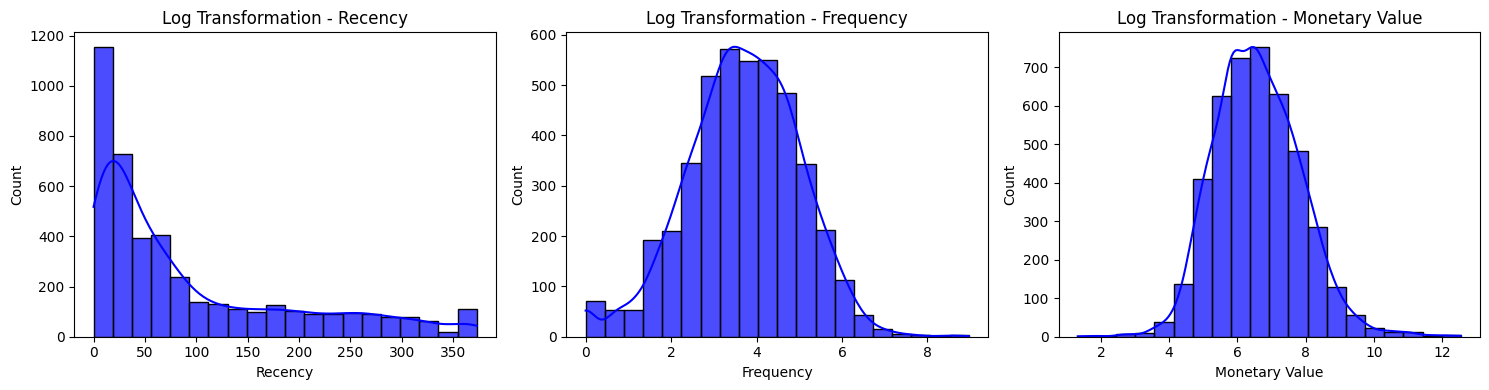

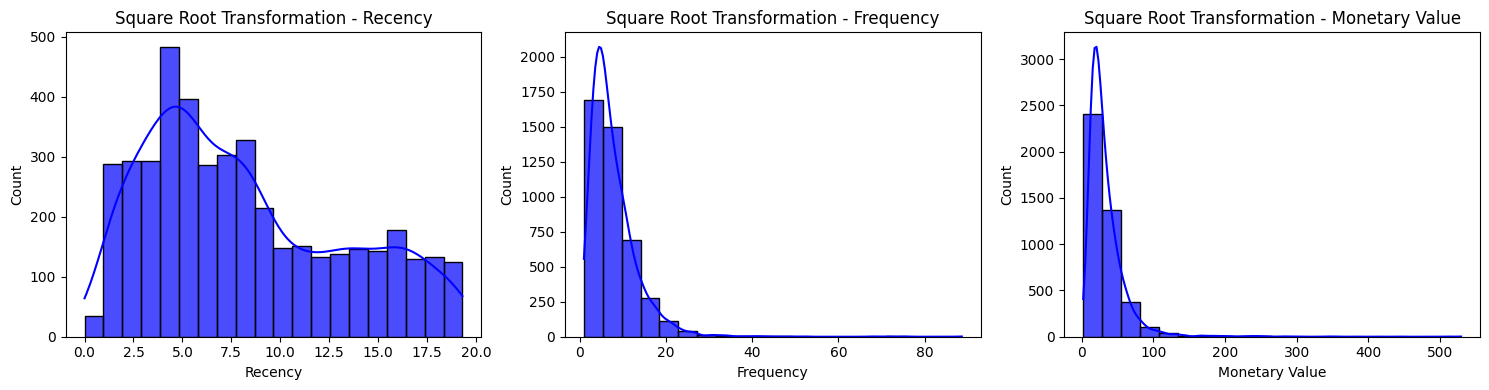

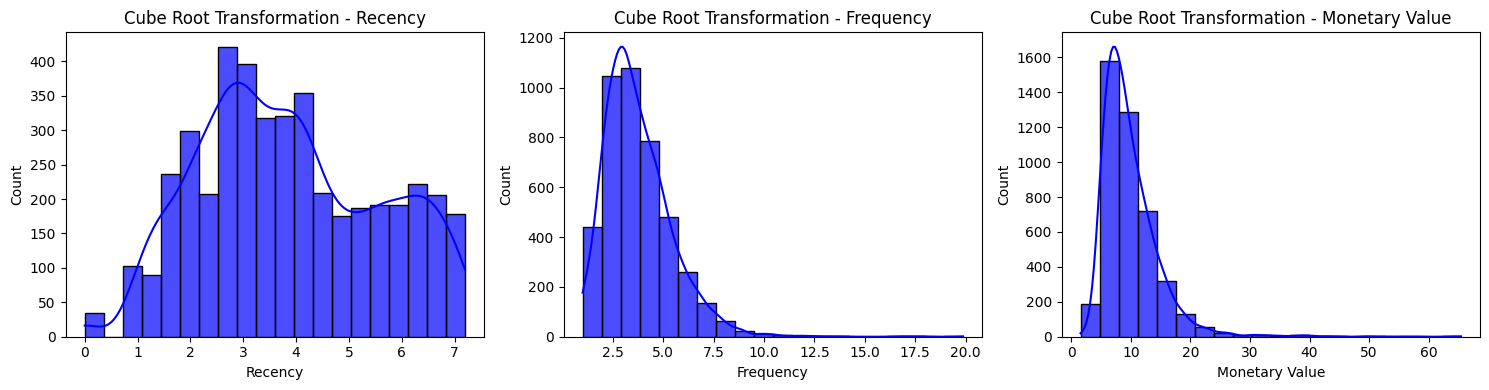

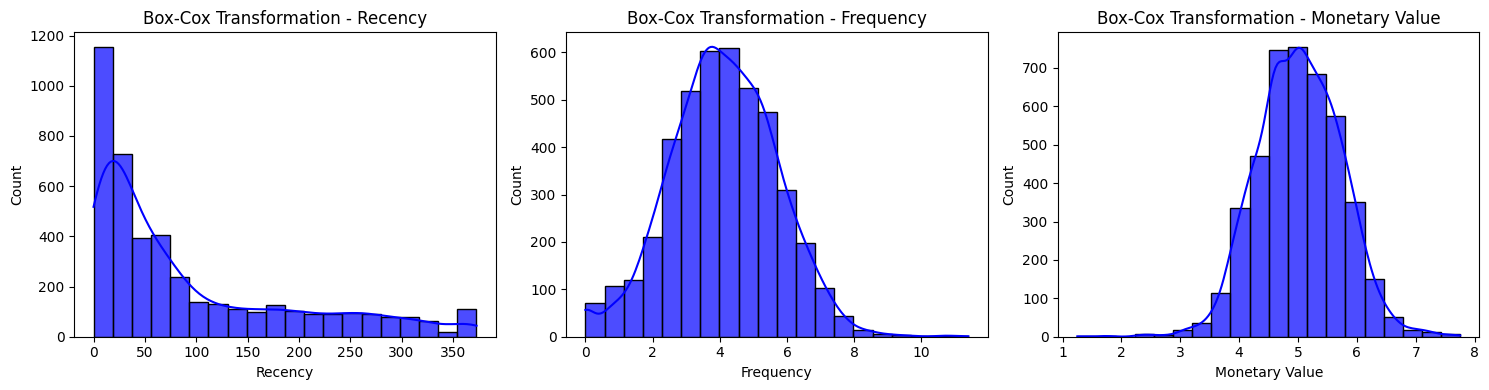

            Column              Transformation  Skewness
0          Recency          Log Transformation  1.245395
1        Frequency          Log Transformation -0.218164
2   Monetary Value          Log Transformation  0.380805
3          Recency  Square Root Transformation  0.568017
4        Frequency  Square Root Transformation  3.222202
5   Monetary Value  Square Root Transformation  5.885761
6          Recency    Cube Root Transformation  0.212635
7        Frequency    Cube Root Transformation  1.514243
8   Monetary Value    Cube Root Transformation  2.999930
9          Recency      Box-Cox Transformation  1.245395
10       Frequency      Box-Cox Transformation  0.004134
11  Monetary Value      Box-Cox Transformation -0.015826
Optimal transformation:
            Column            Transformation  Skewness
10       Frequency    Box-Cox Transformation  0.004134
11  Monetary Value    Box-Cox Transformation -0.015826
6          Recency  Cube Root Transformation  0.212635


In [ ]:
numeric_cols = ['Recency', 'Frequency', 'Monetary Value']
transformations = {
    "Log Transformation": lambda x: np.log(x) if x.min() > 0 else x,  # Only apply if values are positive
    "Square Root Transformation": lambda x: np.sqrt(x),
    "Cube Root Transformation": lambda x: np.cbrt(x),  # Works with negative values
    "Box-Cox Transformation": lambda x: boxcox(x)[0] if x.min() > 0 else x  # Handle non-positive values appropriately
}

def analyze_transformations(data, transformations, columns):
    # Create a list to store skewness results
    skewness_results = []

    for name, func in transformations.items():
        transformed_data = data.copy()

        for col in columns:
            try:
                transformed_data[col] = func(data[col])
                skewness_value = skew(transformed_data[col])
                skewness_results.append({
                    'Column': col,
                    'Transformation': name,
                    'Skewness': skewness_value
                })
            except Exception as e:
                print(f"Could not apply {name} to {col}: {e}")
                skewness_results.append({
                    'Column': col,
                    'Transformation': name,
                    'Skewness': None
                })

    # Convert the list of results into a DataFrame
    return pd.DataFrame(skewness_results)

# Find the best transformation for each column
def find_best_transformation(skewness_df):
    # Group by 'Column' and find the row with skewness closest to 0
    skewness_df['Absolute Skewness'] = skewness_df['Skewness'].abs()
    best_transformations = skewness_df.loc[skewness_df.groupby('Column')['Absolute Skewness'].idxmin()]
    return best_transformations[['Column', 'Transformation', 'Skewness']]



def plot_transformations(data, transformations, columns, n_cols=3):
  skewness_before = {col: skew(data[col]) for col in columns}  # Skewness before transformations
  for name, func in transformations.items():
    transformed_data = data.copy()

    for col in columns:
          try:
                transformed_data[col] = func(data[col])
          except Exception as e:
                print(f"Could not apply {name} to {col}: {e}")



    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()
    for i, col in enumerate(columns):
        sns.histplot(transformed_data[col], kde=True, bins=20, color="blue", alpha=0.7, ax=axes[i])
        axes[i].set_title(f"{name} - {col}")

        # Hide any unused subplots
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


plot_transformations(customers_rfm, transformations, numeric_cols)
skewness_results = analyze_transformations(customers_rfm, transformations, numeric_cols)
print(skewness_results)
print("Optimal transformation:")
best_transformations = find_best_transformation(skewness_results)
print(best_transformations)

In [ ]:
from scipy import stats
df_rfm = customers_rfm.copy()
for col in numeric_cols:
  if col == 'Recency':
    df_rfm[col] = np.cbrt(customers_rfm[col])
  else:
    df_rfm[col] = stats.boxcox(customers_rfm[col])[0]

In [ ]:
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary Value
0,12346.0,6.875344,0.000000,7.280023
1,12347.0,1.259921,5.967408,6.011122
2,12348.0,4.217163,3.756089,5.561659
3,12349.0,2.620741,4.800962,5.549746
4,12350.0,6.767899,3.050162,4.599025


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm[numeric_cols])
df_rfm_normalized = pd.DataFrame(df_rfm_scaled, columns = ['Recency', 'Frequency', 'Monetary Value'])
df_rfm_normalized.head()

,Recency,Frequency,Monetary Value
0,1.777484,-2.571781,3.144114
1,-1.539379,1.166178,1.376049
2,0.207376,-0.218983,0.749774
3,-0.735583,0.435521,0.733175
4,1.714019,-0.661173,-0.591544


### Applying K-Means Clustering Algorithm

#### Finding the optimal number of clusters using Elbow method and Silhouette Score

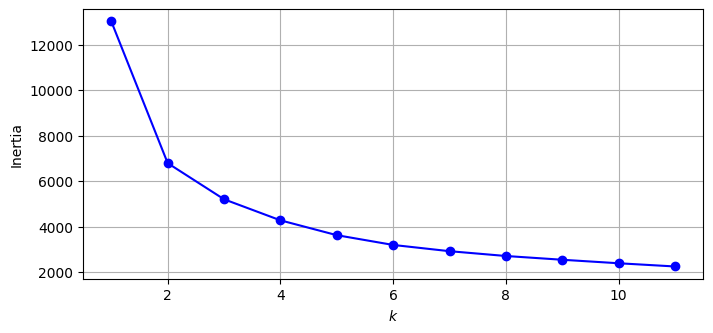

In [ ]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, n_init = 10, random_state = 42).fit(df_rfm_normalized) for k in range(1,12)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8,3.5))
plt.plot(range(1,12), inertias, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.axis('auto')
plt.grid()

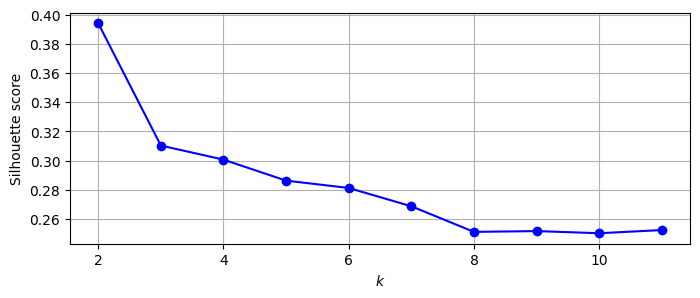

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(df_rfm_normalized, model.labels_) for model in kmeans_per_k[1:]]
k_values = range(2, len(silhouette_scores) + 2)
plt.figure(figsize=(8,3))
plt.plot(k_values, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis('auto')
plt.grid()


In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)
df_rfm['Cluster'] = kmeans.fit_predict(df_rfm_normalized)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary Value,Cluster
0,12346.0,6.875344,0.000000,7.280023,2
1,12347.0,1.259921,5.967408,6.011122,3
2,12348.0,4.217163,3.756089,5.561659,2
3,12349.0,2.620741,4.800962,5.549746,3
4,12350.0,6.767899,3.050162,4.599025,1


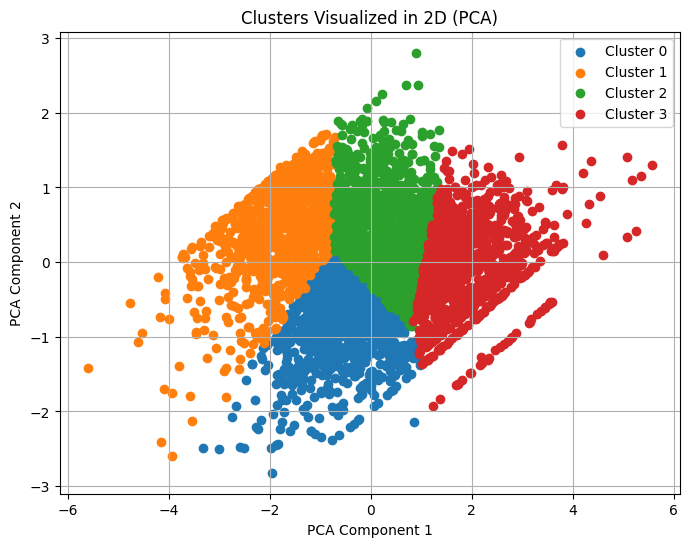

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_rfm_normalized)

# Create a scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(4):
    plt.scatter(pca_result[df_rfm['Cluster'] == cluster, 0],
                pca_result[df_rfm['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')
plt.title("Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()


In [ ]:
df_rfm['KMeans_Cluster'] = kmeans.labels_
kmeans_avg_df = df_rfm.groupby('KMeans_Cluster')[numeric_cols].mean()
kmeans_avg_df.head()

,Recency,Frequency,Monetary Value
KMeans_Cluster,,,
0,3.060912,3.114660,4.556489
1,6.079091,2.623537,4.352826
2,4.152993,4.580418,5.270324
3,2.145005,5.933827,5.831484


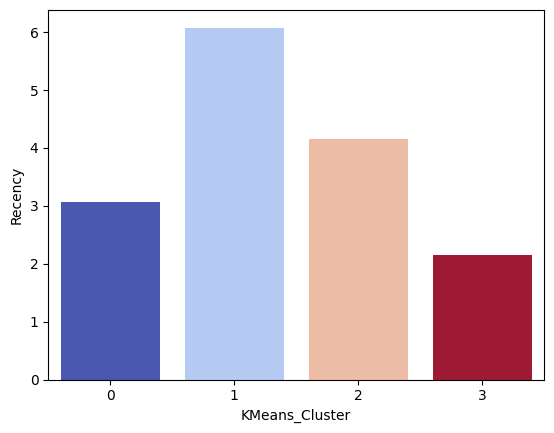

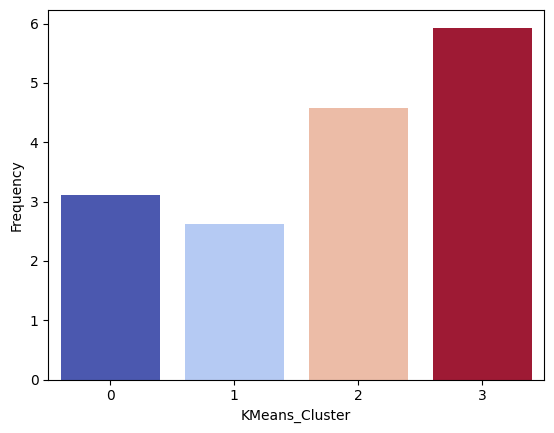

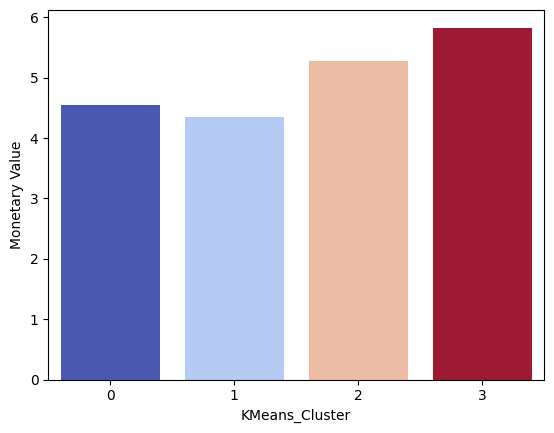

In [ ]:
for i in numeric_cols:
  sns.barplot(x = 'KMeans_Cluster', y = str(i), data = kmeans_avg_df, hue = 'KMeans_Cluster',palette='coolwarm', legend = False)
  plt.show()

### Using DBSCAN Clustering Algorithm

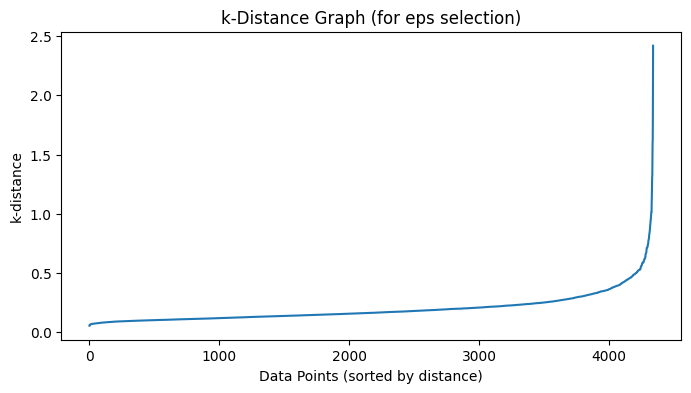

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors = 5)
neighbors_fit = neighbors.fit(df_rfm_normalized)
distances, indices = neighbors_fit.kneighbors(df_rfm_normalized)

distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("k-Distance Graph (for eps selection)")
plt.xlabel("Data Points (sorted by distance)")
plt.ylabel("k-distance")
plt.show()

In [ ]:
eps = 0.4
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_rfm['DBSCAN_Cluster'] = dbscan.fit_predict(df_rfm_normalized)

# Check cluster distribution
print(df_rfm['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    4127
-1     141
 4      30
 2       8
 1       8
 3       7
 5       7
 7       5
 6       5
Name: count, dtype: int64


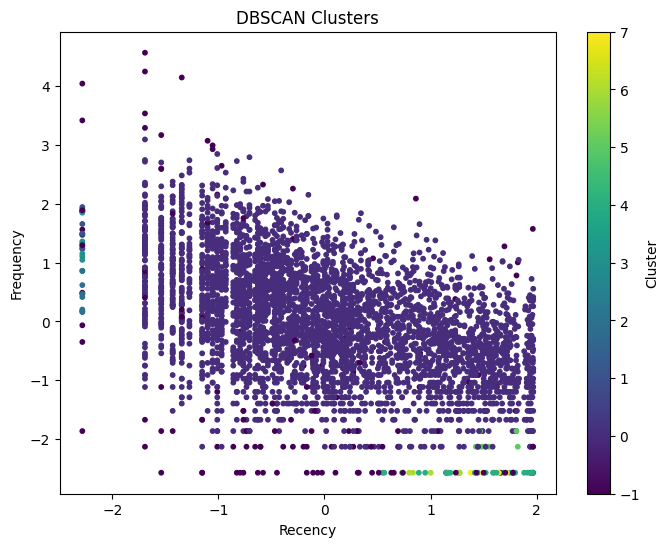

In [ ]:
import matplotlib.pyplot as plt

# Ensure df_rfm_normalized is a NumPy array
if isinstance(df_rfm_normalized, pd.DataFrame):
    df_rfm_normalized = df_rfm_normalized.values

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    df_rfm_normalized[:, 0],  # Recency
    df_rfm_normalized[:, 1],  # Frequency
    c=df_rfm['DBSCAN_Cluster'].values,  # Cluster labels
    cmap='viridis',
    s=10
)
plt.colorbar(label='Cluster')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('DBSCAN Clusters')
plt.show()


In [ ]:
df_rfm['DBSCAN_Cluster'] = dbscan.labels_
df_rfm.groupby('DBSCAN_Cluster')[numeric_cols].mean()


,Recency,Frequency,Monetary Value
DBSCAN_Cluster,,,
-1,3.349769,3.159274,5.275302
0,3.877475,4.173324,5.020517
1,0.000000,6.624432,6.565001
2,0.000000,4.912194,5.542462
3,0.000000,6.228277,5.987534
4,6.338814,0.000000,3.854190
5,6.545189,0.826973,5.105728
6,5.440183,0.000000,4.710099
7,6.640873,0.000000,3.006772


 KMeans provides cleaner segmentation, while DBSCAN identifies noise and smaller dense groups.

We can identify the attributes of customers using the charts of KMeans clusters.

* **Cluster-3** : Loyal and valuable customers - Low recency and high frequency and monetary value
* **Cluster-2** : Loyal customers - High freq and monetary value but moderate recency(regular customers)
* **Cluster-1** : At-Risk customers - High recency, low frequency and moderate monetary.
* **Cluster-0** : Casual customers - Low freq, moderate recency and monetary






Using DBSCAN:

* **Clusters 1,2,3** - Loyal customers
* **Cluster 4, 6, 7** - Lost/Inactive Customers
* **Cluster 5** - Occasional Customers]
* **Cluster -1** - Noise